In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten, Input, Lambda
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.losses import mse, binary_crossentropy
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard
import pandas as pd

from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.models import Model, load_model
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing.data import StandardScaler

C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [44]:
dataset_loc = 'datasets/covertype/covtype.data'

cols = ['Elevation', 'Aspect', 'Slope', 'Hor2Hydro', 'Ver2Hydro', 'Hor2Road', 'Hillshade_9am', 'Hillshade_Noon',
        'Hillshade_3pm', 'Hor2FirePt']

for f in range(0, 4):
    cols.append('Wilderness_Area_{}'.format(f))
    
for f in range(0, 40):
    cols.append('Soil_Type_%d'%f)

cols.append("Cover_Type")

df = pd.read_csv(dataset_loc, sep=',', names=cols)
df.head()

,Elevation,Aspect,Slope,Hor2Hydro,Ver2Hydro,Hor2Road,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Hor2FirePt,Wilderness_Area_0,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Soil_Type_0,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [68]:
pd.set_option('display.max_columns', 55)

# for f in range(0, 40):
#     df['Soil_Type_%d'%f] = StandardScaler().fit_transform(df['Soil_Type_%d'%f].values.reshape(-1, 1))

df['Elevation'] = StandardScaler().fit_transform(df['Elevation'].values.reshape(-1, 1))
df['Aspect'] = StandardScaler().fit_transform(df['Aspect'].values.reshape(-1, 1))
df['Hor2Hydro'] = StandardScaler().fit_transform(df['Hor2Hydro'].values.reshape(-1, 1))
df['Ver2Hydro'] = StandardScaler().fit_transform(df['Ver2Hydro'].values.reshape(-1, 1))
df['Hor2Road'] = StandardScaler().fit_transform(df['Hor2Road'].values.reshape(-1, 1))
df['Hor2FirePt'] = StandardScaler().fit_transform(df['Hor2FirePt'].values.reshape(-1, 1))
df['Hillshade_9am'] = StandardScaler().fit_transform(df['Hillshade_9am'].values.reshape(-1, 1))
df['Hillshade_Noon'] = StandardScaler().fit_transform(df['Hillshade_Noon'].values.reshape(-1, 1))
df['Hillshade_3pm'] = StandardScaler().fit_transform(df['Hillshade_3pm'].values.reshape(-1, 1))

df.tail()

C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,Elevation,Aspect,Slope,Hor2Hydro,Ver2Hydro,Hor2Road,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Hor2FirePt,Wilderness_Area_0,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Soil_Type_0,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
581007,-2.012130,-0.023740,20,-0.867697,-0.504653,-1.437962,1.040496,0.692069,-0.640851,-0.863386,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581008,-2.029988,-0.032675,19,-0.952383,-0.590424,-1.446299,1.040496,0.692069,-0.614724,-0.857345,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581009,-2.047847,0.029873,17,-0.985317,-0.676194,-1.449506,0.891075,0.894409,-0.327327,-0.850548,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581010,-2.054990,0.128163,15,-0.985317,-0.710502,-1.449506,0.666942,1.096749,0.012325,-0.842997,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581011,-2.058562,0.083486,13,-0.985317,-0.727656,-1.464256,0.704298,1.046164,-0.039929,-0.834690,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [69]:
#10 non categorical and considered class 4 as anomaly and class 2 as normal.

#class 2 only has 2747 points while class 4 has 283301 points.

normal = df[df['Cover_Type'] == 2]
anomalies = df[df['Cover_Type'] == 4]

normal.loc[normal.Cover_Type == 2, 'Cover_Type'] = 0
anomalies.loc[anomalies.Cover_Type == 4, 'Cover_Type'] = 1


# for f in range(40):
#     normal=normal.drop("Soil_Type_%d"%f, axis=1)
#     anomalies=anomalies.drop("Soil_Type_%d"%f, axis=1)
    
anomalies.shape, normal.shape

C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


((2747, 55), (283301, 55))

In [70]:
normal.head()

,Elevation,Aspect,Slope,Hor2Hydro,Ver2Hydro,Hor2Road,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Hor2FirePt,Wilderness_Area_0,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Soil_Type_0,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
2,-0.554907,-0.148836,9,-0.006719,0.318742,0.532212,0.816364,0.742654,-0.196691,3.126965,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.622768,-0.005869,18,-0.129044,1.227908,0.474492,0.965786,0.742654,-0.536343,3.194931,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,-1.358523,-0.211385,6,0.143834,-1.053584,-1.464256,0.666942,0.692069,-0.066056,3.058999,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
11,-0.262033,-0.041611,11,0.477874,-0.350267,1.861694,0.816364,0.843824,-0.170564,1.563750,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
12,-0.776348,-0.193514,22,-0.561885,0.387359,0.554659,1.339340,0.034463,-1.320155,3.104310,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [71]:

for f in range(0, 20):
    normal = normal.iloc[np.random.permutation(len(normal))]
    
data_set = normal[:50000]
# data_set = pd.concat([normal[:100000], anomalies])

x_train, x_test = train_test_split(data_set, test_size = 0.4, random_state = 42)

# x_train = x_train.sort_values(by=['Time'])
# x_test = x_test.sort_values(by=['Time'])

y_train = x_train["Cover_Type"]
y_test = x_test["Cover_Type"]

#normal is 0
#anomaly is 1


        
        
x_train = x_train.drop("Cover_Type", axis=1)
x_test = x_test.drop("Cover_Type", axis=1)

x_train.head(10)

,Elevation,Aspect,Slope,Hor2Hydro,Ver2Hydro,Hor2Road,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Hor2FirePt,Wilderness_Area_0,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Soil_Type_0,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
510394,0.823741,0.843000,9,-0.166682,0.301588,-1.239148,-0.416366,1.197919,1.083535,0.147795,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
170561,0.302284,-0.640287,6,0.186177,-0.178726,0.191664,0.629587,0.287388,-0.248945,-0.725944,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
74726,-0.665627,-0.488384,2,-1.126460,-0.779119,0.171142,0.405454,0.641484,0.142960,-0.016834,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
445282,0.691591,0.217518,15,1.127136,0.215818,-0.127719,0.442810,1.248504,0.247469,-0.731231,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
340872,-1.194228,1.629321,9,0.435531,2.823238,-1.245562,-0.453721,0.186218,0.613247,-0.742558,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
198297,1.030895,-0.238191,15,-1.070003,-0.556116,1.374282,1.189918,0.337973,-0.849868,-0.710086,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
348726,-0.744203,0.029873,28,0.143834,1.468065,-0.352827,0.891075,0.388558,-0.980503,-0.465409,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
477092,0.688019,1.146806,6,-0.985317,-0.641886,-0.949266,-0.304299,0.843824,0.874518,-0.005506,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
87836,0.105844,-0.783254,9,0.699000,-0.796273,0.640597,0.629587,-0.016122,-0.431835,2.771277,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
130106,0.373716,1.441676,16,0.002690,-0.384575,1.581432,-1.350251,0.034463,1.161916,-1.219830,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [72]:
print("Shapes:\nx_train:%s\ny_train:%s\n" % (x_train.shape, y_train.shape))
print("x_test:%s\ny_test:%s\n" % (x_test.shape, y_test.shape))


Shapes:
x_train:(30000, 54)
y_train:(30000,)

x_test:(20000, 54)
y_test:(20000,)



In [73]:
x_train = np.array(x_train).reshape(x_train.shape[0], x_train.shape[1])
x_test = np.array(x_test).reshape(x_test.shape[0], x_test.shape[1])
input_shape = (x_train.shape[1])

# y_train = keras.utils.to_categorical(y_train, 2)
# y_test = keras.utils.to_categorical(y_test, 2)


In [74]:
print("Shapes:\nx_train:%s\ny_train:%s\n" % (x_train.shape, y_train.shape))
print("x_test:%s\ny_test:%s\n" % (x_test.shape, y_test.shape))
print("input_shape:{}\n".format(input_shape))

Shapes:
x_train:(30000, 54)
y_train:(30000,)

x_test:(20000, 54)
y_test:(20000,)

input_shape:54



In [75]:
def sampling(args):
    """Reparameterization trick by sampling from an isotropic unit Gaussian.
    # Arguments
        args (tensor): mean and log of variance of Q(z|X)
    # Returns
        z (tensor): sampled latent vector
    """

    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    # by default, random_normal has mean = 0 and std = 1.0
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

In [76]:
logfilename = "variationalautoencoder"


original_dim  = x_train.shape[1]

print(original_dim)

input_shape = (original_dim,)
intermediate_dim = 30
batch_size = 64
latent_dim = 5
epochs = 200


# VAE model = encoder + decoder
# build encoder model
inputs = Input(shape=input_shape, name='encoder_input')
x = Dense(intermediate_dim, activation='relu')(inputs)
x_1 = Dense(int(original_dim/3), activation='relu')(x)
z_mean = Dense(latent_dim, name='z_mean')(x_1)
z_log_var = Dense(latent_dim, name='z_log_var')(x_1)

# use reparameterization trick to push the sampling out as input
# note that "output_shape" isn't necessary with the TensorFlow backend
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

# instantiate encoder model
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
encoder.summary()

# build decoder model
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(int(original_dim/3), activation='relu')(latent_inputs)
x_1 = Dense(intermediate_dim, activation='relu')(x)

# x = Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = Dense(original_dim, activation='sigmoid')(x)

# instantiate decoder model
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae_mlp')


# VAE loss = mse_loss or xent_loss + kl_loss
reconstruction_loss = mse(inputs, outputs)

reconstruction_loss *= original_dim
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)

54
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
encoder_input (InputLayer)       (None, 54)            0                                            
____________________________________________________________________________________________________
dense_35 (Dense)                 (None, 30)            1650        encoder_input[0][0]              
____________________________________________________________________________________________________
dense_36 (Dense)                 (None, 18)            558         dense_35[0][0]                   
____________________________________________________________________________________________________
z_mean (Dense)                   (None, 5)             95          dense_36[0][0]                   
________________________________________________________________________________________

In [77]:


vae.compile(optimizer='adam', 
                    loss='mean_squared_error',
                    metrics=['accuracy'])
vae.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 54)                0         
_________________________________________________________________
encoder (Model)              [(None, 5), (None, 5), (N 2398      
_________________________________________________________________
decoder (Model)              (None, 54)                1134      
Total params: 3,532
Trainable params: 3,532
Non-trainable params: 0
_________________________________________________________________


In [78]:
history = vae.fit(x_train, x_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle=True,
                    validation_data=(x_test, x_test),
                    callbacks=[TensorBoard(log_dir='../logs/{0}'.format(logfilename))])

Train on 30000 samples, validate on 20000 samples
Epoch 1/200
30000/30000 [==============================] - 5s - loss: 227.8170 - acc: 0.9340 - val_loss: 219.7661 - val_acc: 0.9883
Epoch 2/200
30000/30000 [==============================] - 5s - loss: 222.7821 - acc: 0.9894 - val_loss: 218.3021 - val_acc: 0.9883
Epoch 3/200
30000/30000 [==============================] - 5s - loss: 221.7080 - acc: 0.9894 - val_loss: 217.6317 - val_acc: 0.9883
Epoch 4/200
30000/30000 [==============================] - 4s - loss: 221.3684 - acc: 0.9894 - val_loss: 217.4571 - val_acc: 0.9883
Epoch 5/200
30000/30000 [==============================] - 4s - loss: 221.2215 - acc: 0.9894 - val_loss: 217.3061 - val_acc: 0.9883
Epoch 6/200
30000/30000 [==============================] - 5s - loss: 221.1063 - acc: 0.9894 - val_loss: 217.2317 - val_acc: 0.9883
Epoch 7/200
25984/30000 [========================>.....] - ETA: 0s - loss: 220.7464 - acc: 0.9891

KeyboardInterrupt: 

In [13]:
# y_test

In [49]:
predictions = vae.predict(x_test)

mse_error = np.mean(np.power(x_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse_error,
                        'true_class': y_test})

error_df.describe()

,reconstruction_error,true_class
count,20000.000000,20000.0
mean,4.538495,0.0
std,5.524274,0.0
min,0.061572,0.0
25%,1.383239,0.0
50%,2.969067,0.0
75%,5.754919,0.0
max,102.412486,0.0


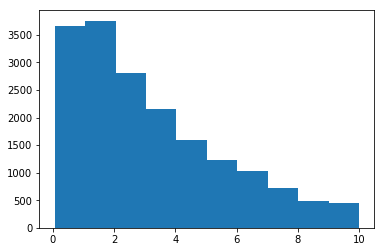

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

In [51]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\sklearn\metrics\ranking.py:571: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


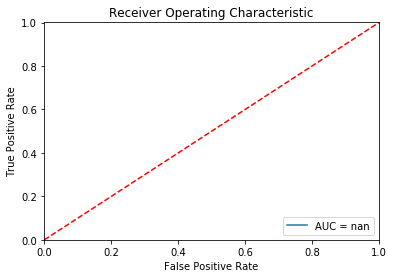

In [52]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

In [53]:
error_df.quantile(0.25)

reconstruction_error    1.383239
true_class              0.000000
Name: 0.25, dtype: float64

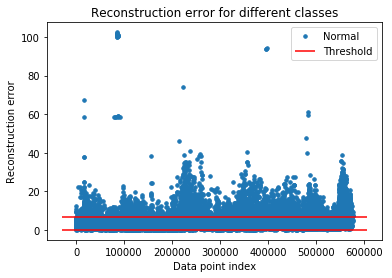

In [54]:
threshold = 1.5 * (error_df.quantile(0.75) - error_df.quantile(0.25))
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

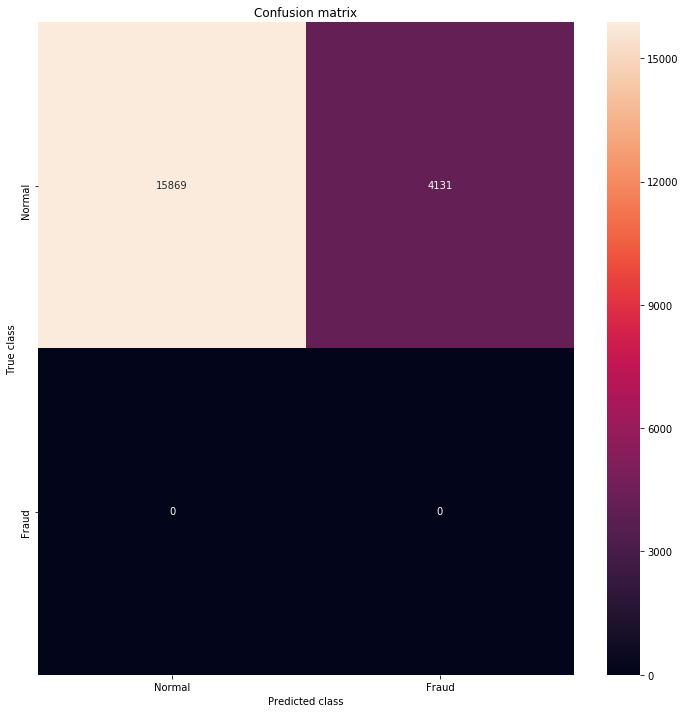

In [55]:
import seaborn as sns

LABELS = ["Normal", "Fraud"]

y_pred = [1 if e > threshold.reconstruction_error else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [56]:
counter = []

for f in range(0, len(error_df)):
    if error_df.reconstruction_error.values[f] > threshold.reconstruction_error:
        counter.append(1)
    else:
        counter.append(0)

In [57]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score( counter, y_test)
print("AUC: {:.2%}".format (auc))

AUC: 50.00%


In [58]:
anom_class = anomalies['Cover_Type']
anom = anomalies.drop('Cover_Type', axis=1)

anom.head()

,Elevation,Aspect,Slope,Hor2Hydro,Ver2Hydro,Hor2Road,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Hor2FirePt,Wilderness_Area_0,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Soil_Type_0,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
1988,-3.426494,1.450612,7,-1.126460,-0.727656,-1.437962,-0.416366,0.540313,0.770010,-1.293082,0,0,0,1,-0.072416,-0.114549,-0.091491,-0.147649,-0.0525,-0.106986,-0.013444,-0.017555,-0.044475,-0.243947,-0.147734,-0.233216,-0.175866,-0.032125,-0.002272,-0.070148,12.991815,-0.057264,-0.08348,-0.127256,-0.038005,-0.24686,-0.332219,-0.194973,-0.028574,-0.066903,-0.043274,-0.040384,-0.497429,-0.234031,-0.21498,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654
1997,-3.415780,1.781224,6,-1.267604,-0.796273,-1.425776,-0.042811,0.337973,0.378104,-1.281754,0,0,0,1,-0.072416,-0.114549,-0.091491,-0.147649,-0.0525,-0.106986,-0.013444,-0.017555,-0.044475,-0.243947,-0.147734,-0.233216,-0.175866,-0.032125,-0.002272,-0.070148,12.991815,-0.057264,-0.08348,-0.127256,-0.038005,-0.24686,-0.332219,-0.194973,-0.028574,-0.066903,-0.043274,-0.040384,-0.497429,-0.234031,-0.21498,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654
2012,-3.412208,-0.970899,8,-1.267604,-0.796273,-1.411026,0.405454,-0.016122,-0.196691,-1.268916,0,0,0,1,-0.072416,-0.114549,-0.091491,-0.147649,-0.0525,-0.106986,-0.013444,-0.017555,-0.044475,-0.243947,-0.147734,-0.233216,-0.175866,-0.032125,-0.002272,-0.070148,12.991815,-0.057264,-0.08348,-0.127256,-0.038005,-0.24686,-0.332219,-0.194973,-0.028574,-0.066903,-0.043274,-0.040384,-0.497429,-0.234031,-0.21498,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654
2026,-3.405065,-0.738577,11,-1.267604,-0.796273,-1.398199,0.779008,-0.269048,-0.719233,-1.254568,0,0,0,1,-0.072416,-0.114549,-0.091491,-0.147649,-0.0525,-0.106986,-0.013444,-0.017555,-0.044475,-0.243947,-0.147734,-0.233216,-0.175866,-0.032125,-0.002272,-0.070148,12.991815,-0.057264,-0.08348,-0.127256,-0.038005,-0.24686,-0.332219,-0.194973,-0.028574,-0.066903,-0.043274,-0.040384,-0.497429,-0.234031,-0.21498,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654
2039,-3.405065,-0.684964,16,-1.267604,-0.796273,-1.384090,1.040496,-0.724313,-1.241774,-1.239464,0,0,0,1,-0.072416,-0.114549,-0.091491,-0.147649,-0.0525,-0.106986,-0.013444,-0.017555,-0.044475,-0.243947,-0.147734,-0.233216,-0.175866,-0.032125,-0.002272,-0.070148,12.991815,-0.057264,-0.08348,-0.127256,-0.038005,-0.24686,-0.332219,-0.194973,-0.028574,-0.066903,-0.043274,-0.040384,-0.497429,-0.234031,-0.21498,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654


In [59]:
anom = np.array(anom)

In [60]:

anom_predictions = vae.predict(anom)

anom_mse = np.mean(np.power(anom - anom_predictions, 2), axis=1)
anom_error_df = pd.DataFrame({'reconstruction_error': anom_mse,
                        'true_class': anom_class})

anom_error_df.describe()

,reconstruction_error,true_class
count,2747.000000,2747.0
mean,10.745327,1.0
std,7.190430,0.0
min,0.491638,1.0
25%,4.669580,1.0
50%,9.229581,1.0
75%,15.899411,1.0
max,40.484261,1.0


In [61]:
threshold.reconstruction_error

6.557520463258527

In [62]:
# print(np.array(anom_error_df.values[2][0]))

# for f in range(0, len(anom_error_df)):
#     print(np.array(anom_error_df.values[f][0]) > threshold)

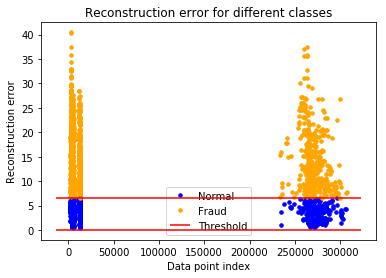

In [63]:
# threshold = threshold.reconstruction_error
groups = anom_error_df.groupby('true_class')
fig, ax = plt.subplots()


for f in range(0, len(anom_error_df)):
    ax.plot(anom_error_df.index[f], anom_error_df.reconstruction_error.values[f], marker='o', ms=3.5, linestyle='',
           label="Fraud" if anom_error_df.reconstruction_error.values[f] > threshold.reconstruction_error else "Normal",
           color="orange" if anom_error_df.reconstruction_error.values[f] > threshold.reconstruction_error else "b")
    

    
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")

handles, labels = plt.gca().get_legend_handles_labels()
newLabels, newHandles = [], []
for handle, label in zip(handles, labels):
    if label not in newLabels:
        newLabels.append(label)
        newHandles.append(handle)
plt.legend(newHandles, newLabels)


plt.show();

In [64]:
counter = 0

for f in range(0, len(anom_error_df)):
    if anom_error_df.reconstruction_error.values[f] > threshold.reconstruction_error:
        counter = counter + 1
    
    
print("Accuracy: {}".format(counter / len(anom_error_df)))

Accuracy: 0.6305060065526028


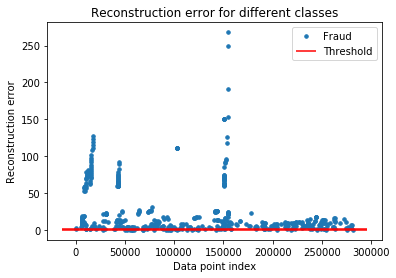

In [86]:

groups = anom_error_df.groupby('true_class')
fig, ax = plt.subplots()



for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if ((group.reconstruction_error.values[name] > threshold.reconstruction_error)) else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [87]:
#### EVALUATION ON THE ENTIRE DF

In [88]:
points = np.array(df.drop('Class', axis=1))
truths = df['Class']

In [89]:
preds = vae.predict(points)

pred_mse = np.mean(np.power(points - preds, 2), axis=1)
pred_error_df = pd.DataFrame({'reconstruction_error': pred_mse,
                        'true_class': truths})

pred_error_df.describe()

,reconstruction_error,true_class
count,284807.000000,284807.000000
mean,0.799555,0.001727
std,5.184158,0.041527
min,0.030845,0.000000
25%,0.230176,0.000000
50%,0.396524,0.000000
75%,0.640139,0.000000
max,1801.725568,1.000000


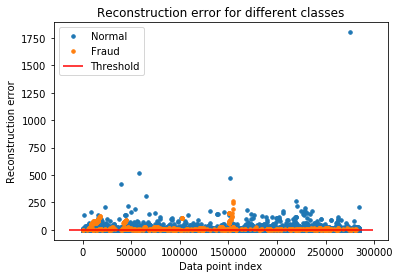

In [90]:
threshold = 1.5 * (pred_error_df.quantile(0.75) - pred_error_df.quantile(0.25))
groups = pred_error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold.reconstruction_error, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

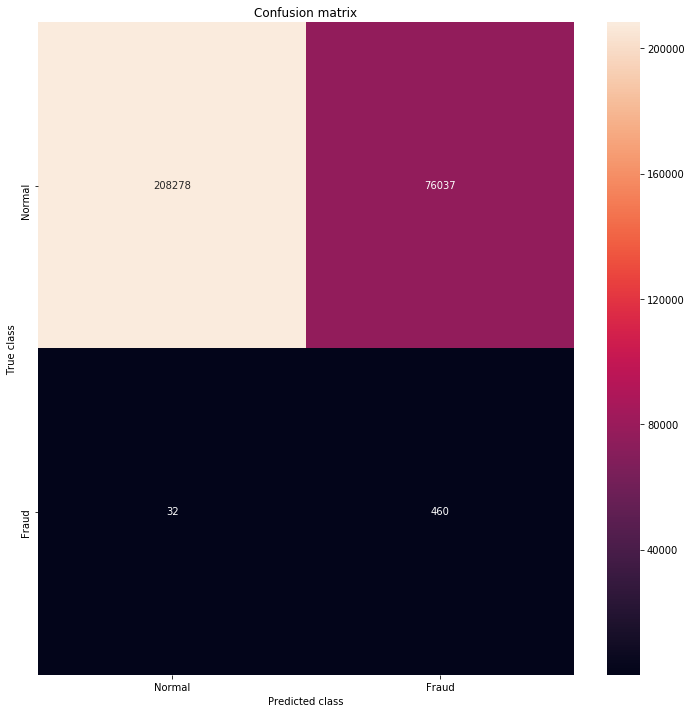

In [91]:
import seaborn as sns
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

LABELS = ["Normal", "Fraud"]

y_pred = [1 if e > threshold.reconstruction_error else 0 for e in pred_error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(pred_error_df.true_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [92]:
counter = []

for f in range(0, len(pred_error_df)):
    if pred_error_df.reconstruction_error.values[f] > threshold.reconstruction_error:
        counter.append(1)
    else:
        counter.append(0)

In [93]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score( counter, truths)
print("AUC: {:.2%}".format (auc))

AUC: 50.29%


Thoughts

Seems like TCN is more suited to high dimension datasets compared to VAE

